<a href="https://colab.research.google.com/github/Bhagya07shree/Simple-house_price_prediction-/blob/main/simple(House_Price_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression Example: House Price Prediction**
This project aims to predict the price of a house based on its area using simple linear regression. The dataset used in this project consists of 1000 houses in Monroe Township, New Jersey, and their respective areas and prices. Here house price is a dependent variable and the area of the house is the independent variable.

The data is stored in a CSV file named house-prices.csv.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# **Load the Dataset**

In [10]:
df=pd.read_csv("house-prices.csv")
print(df.head())  # Display first five rows

   area      price
0  1567  177067.50
1  3345  511748.20
2  3722  404096.67
3  2783  357916.31
4  2949  362409.54


# **Explore the dataset**

In [9]:
print(df.info())  # Basic information about columns and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    1000 non-null   int64  
 1   price   1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB
None


In [11]:
# Check for missing values:

print(df.isnull().sum())

area     0
price    0
dtype: int64


# **Visualize the Data**

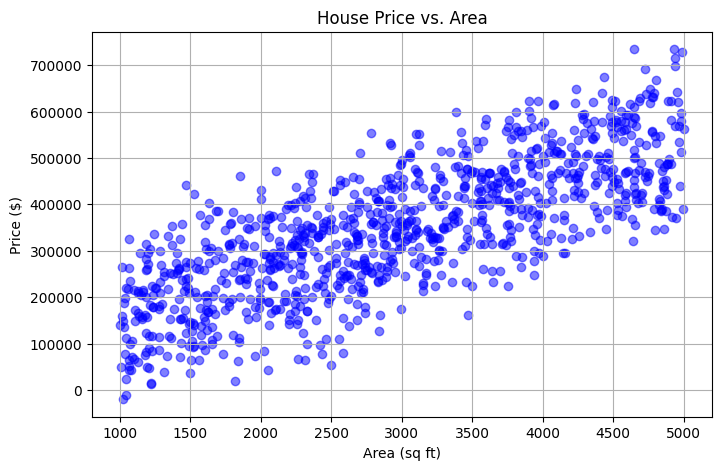

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(df["area"], df["price"], alpha=0.5, color='blue')  # Scatter plot
plt.xlabel("Area (sq ft)")  # X-axis label
plt.ylabel("Price ($)")  # Y-axis label
plt.title("House Price vs. Area")  # Title of the plot
plt.grid(True)  # Show grid lines
plt.show()


# **Split the Dataset into Training and Testing Sets**

In [17]:
X=df[["area"]]  # Independent variable (feature)
y=df["price"]   # Dependent variable (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Train the Model**

In [18]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Evaluate the Model**

In [19]:
y_pred=model.predict(X_test)

r2=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

print("R-squared (R2):", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R2): 0.5944921161653371
Mean Squared Error (MSE): 8950798003.535492


# **Visualize the Regression Line**

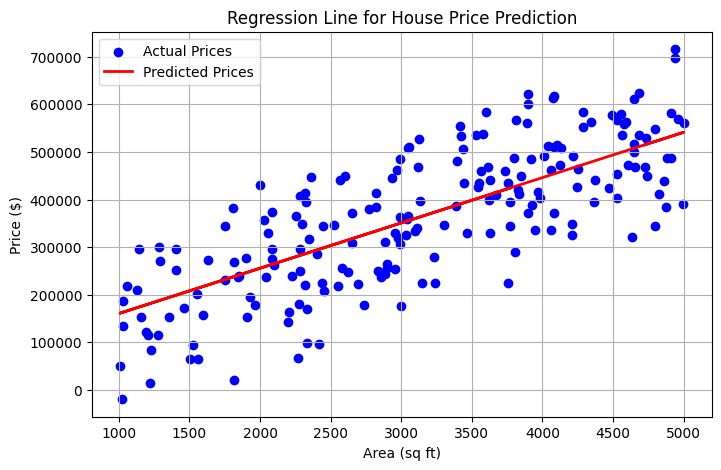

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label="Actual Prices")  # Actual values
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted Prices")  # Regression line
plt.xlabel("Area (sq ft)")
plt.ylabel("Price ($)")
plt.title("Regression Line for House Price Prediction")
plt.legend()  # Show legend
plt.grid(True)
plt.show()


In [23]:
# Create a DataFrame to compare area, actual price, and predicted price
comparison_df = pd.DataFrame({"Area (sq ft)": X_test.values.flatten(),
                              "Actual Price": y_test.values,
                              "Predicted Price": y_pred})

# Display the first 10 rows of the table
print(comparison_df.head(10))


   Area (sq ft)  Actual Price  Predicted Price
0          3770     395448.27    424155.165906
1          1595     157565.03    217034.201556
2          4058     462582.96    451580.838427
3          2990     485216.17    349877.302829
4          2085     275271.61    263695.936054
5          3600     582865.03    407966.400876
6          2819     413268.13    333593.309770
7          2331      98776.88    287122.031332
8          1056     217675.99    165706.293610
9          4682     534595.94    511003.128889


In [21]:
area_value = np.array([[2500]])  # Example: Predicting price for a 2500 sq ft house
predicted_price = model.predict(area_value)
print("Predicted House Price for 2500 sq ft:", predicted_price[0])


Predicted House Price for 2500 sq ft: 303215.56833179295


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Feature Engineering**

In [25]:

# Feature Engineering: Add Price per Square Foot
df["price_per_sqft"] = df["price"] / df["area"]

# Handle missing values (if any)
df = df.dropna()

# Define independent (X) and dependent (y) variables
X = df[["area", "price_per_sqft"]]  # Select only two key features
y = df["price"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
print("New R² Score:", r2)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Print the MSE value
print("Mean Squared Error (MSE):", mse)


New R² Score: 0.9225042746888878
Mean Squared Error (MSE): 1710567441.5939531


# **Use Random Forest (Handles Complex Patterns)**

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
print("New R² Score:", r2)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("Random Forest MSE:", mse_rf)


New R² Score: 0.9225042746888878
Random Forest MSE: 96114298.12977476


In [28]:
import pandas as pd

# Create a DataFrame to compare actual vs. predicted values
comparison_df = pd.DataFrame({
    "Area": X_test["area"],  # Area of the house
    "Actual Price": y_test,  # Actual house price
    "Predicted Price": y_pred  # Model's predicted price
})

# Display the first 10 rows
print(comparison_df.head(10))

     Area  Actual Price  Predicted Price
521  3770     395448.27    406930.992045
737  1595     157565.03    144511.520253
740  4058     462582.96    458356.292574
660  2990     485216.17    432662.157237
411  2085     275271.61    267723.528831
678  3600     582865.03    502065.473836
626  2819     413268.13    381457.902764
513  2331      98776.88    115680.763799
859  1056     217675.99    298454.729254
136  4682     534595.94    530498.086412
